In [1]:
from cnp.data import PredatorPreyGenerator
import argparse
import torch

import matplotlib.pyplot as plt

In [17]:
device = torch.device('cpu')

gen =  PredatorPreyGenerator(iterations_per_epoch=1024,
                             batch_size=16,
                             x_context_ranges=[0, 100],
                             max_num_context=50,
                             min_num_target=100,
                             max_num_target=100,
                             device=device,
                             x_target_ranges=None)

In [18]:
# %time train_data = [[batch for batch in gen] for epoch in range(1)]

In [19]:
%time epoch = gen.pregen_epoch()

CPU times: user 2.45 s, sys: 360 ms, total: 2.81 s
Wall time: 5min 15s


In [20]:
len(epoch)

1024

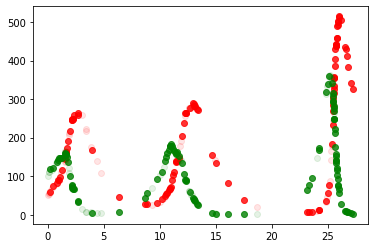

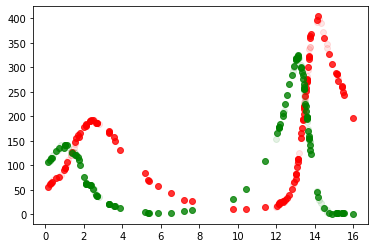

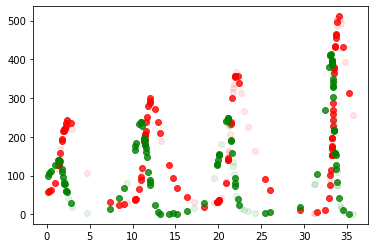

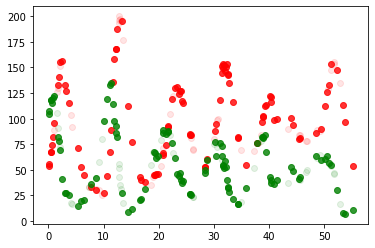

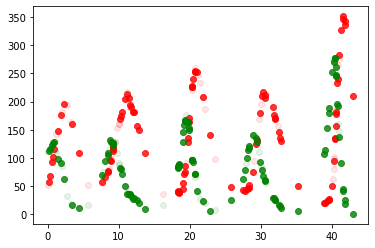

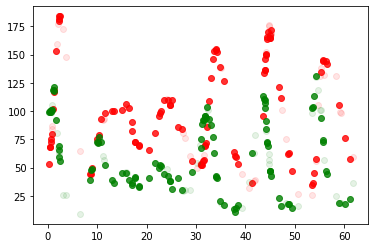

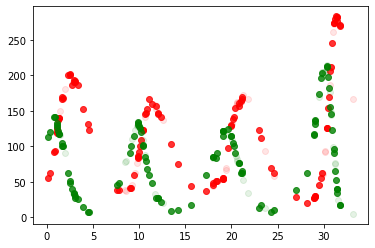

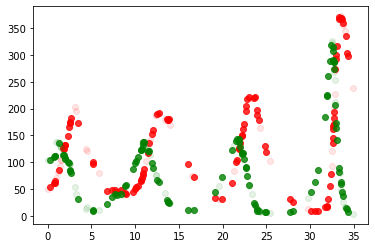

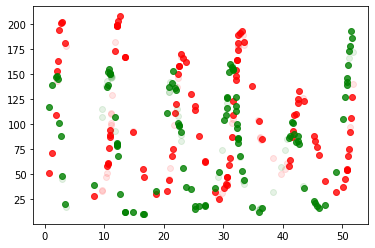

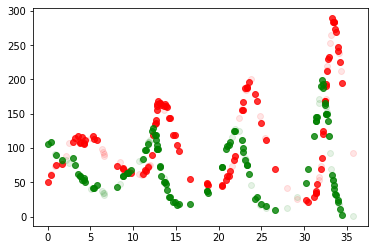

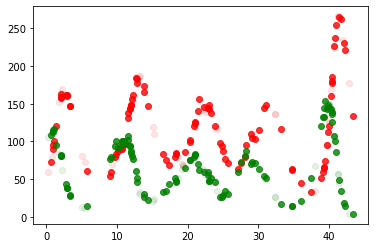

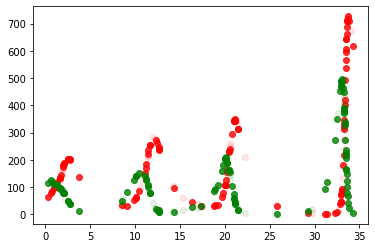

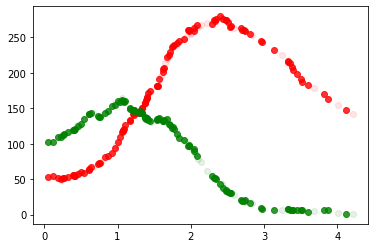

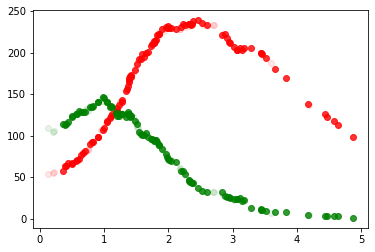

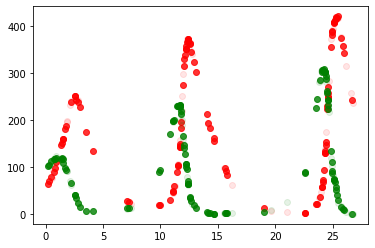

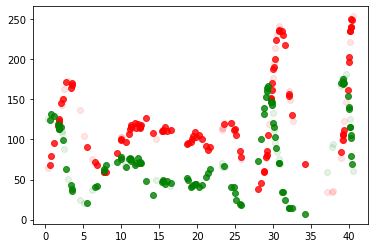

In [21]:
task = epoch[0]

for idx in range(16):

    plt.scatter(task['x_context'][idx, :], task['y_context'][idx, 0, :], c='red', alpha=0.1)
    plt.scatter(task['x_target'][idx, :], task['y_target'][idx, 0, :], c='red', alpha=0.8)

    plt.scatter(task['x_context'][idx, :], task['y_context'][idx, 1, :], c='green', alpha=0.1)
    plt.scatter(task['x_target'][idx, :], task['y_target'][idx, 1, :], c='green', alpha=0.8)
#     plt.scatter(task['x'][idx, :], task['y'][idx, 1, :])
    plt.show()

In [22]:
!pip install jax

     |████████████████████████████████| 693 kB 8.0 MB/s eta 0:00:01     |██████████                      | 215 kB 8.0 MB/s eta 0:00:01
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Created wheel for jax: filename=jax-0.2.17-py3-none-any.whl size=797307 sha256=1eb29a93eaa8a2d0ecd51311984920f699031010693d3ada055ff90b52793321
  Stored in directory: /homes/em626/.cache/pip/wheels/c0/04/e9/96543974a96ee70858fe2d8e36dbe24dcf77b32f206ec01112
Successfully built jax
You should consider upgrading via the '/scratches/cblgpu07/em626/kernelcnp/venv-kernelcnp/bin/python -m pip install --upgrade pip' command.


In [42]:
import jax
import jax.numpy as jnp

@jax.jit
def make_series(key,
                init_num_pred,
                init_num_prey,
                pred_born,
                pred_death,
                prey_born,
                prey_death,
                time_start,
                time_end,
                num_points):

    # Arrays for storing times and predator/prey populations
    time = []
    pred = []
    prey = []

    # Initialise predator/prey populations
    num_pred = init_num_pred
    num_prey = init_num_prey

    # Regenerate until minimum number of points present in the series
    for i in range(num_points):

        # Reset initial time and predator/prey populations
#         t = time_start
#         time = [time_start]
#         pred = [num_pred]
#         prey = [num_prey]

        # Predator and prey birth and death rates
        pred_birth_rate = pred_born * num_prey * num_pred
        pred_death_rate = pred_death * num_pred
        prey_birth_rate = prey_born * num_prey
        prey_death_rate = prey_death * num_prey * num_pred

        # Total activity rate (determines intervals between events)
        total_rate = pred_birth_rate + \
                     pred_death_rate + \
                     prey_birth_rate + \
                     prey_death_rate

        # Time at which next event occurs
#         t = t + jnp.random.exponential(1. / total_rate, 1)[0]

        # Sample the type of the event
        activities = [pred_birth_rate/total_rate,
                      pred_death_rate/total_rate,
                      prey_birth_rate/total_rate,
                      prey_death_rate/total_rate]
        activities = jnp.array(activities)
        event = jax.random.choice(key=key, a=jnp.arange(4), p=activities)

        # Predator born
        if event == 0:
            num_pred = num_pred + 1

        # Predator dies
        elif event == 1:
            num_pred = max(num_pred - 1, 0)

        # Prey born
        elif event == 2:
            num_prey = num_prey + 1

        # Prey dies
        else:
            num_prey = max(num_prey - 1, 0)

        # Record time and populations
#         time.append(t)
#         pred.append(num_pred)
#         prey.append(num_prey)

    return #. jnp.array(time), jnp.array(pred), jnp.array(prey)

In [43]:
init_num_pred = 100
init_num_prey = 50
pred_born = 0.01
pred_death = 0.01
prey_born = 0.01
prey_death = 0.01
time_start = 0.
time_end = 100.
num_points = 1000

make_series(jax.random.PRNGKey(0),
            init_num_pred,
            init_num_prey,
            pred_born,
            pred_death,
            prey_born,
            prey_death,
            time_start,
            time_end,
            num_points)

TracerIntegerConversionError: The __index__() method was called on the JAX Tracer object Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)>
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError